In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [4]:
df=pd.read_csv(r"D:\ML\nb\dataset_sales.csv")
df

,Campaign_ID,Campaign_Name,Product_Category,Channel,Promo_Type,Impressions,Clicks,Conversions,Cost,Revenue
0,AD001,Ultraboost Restock,Accessories,Email,Influencer Collab,122776,15879,3312,44134.17,514605.54
1,AD002,Stan Smith Edition,Accessories,TikTok,Influencer Collab,98929,1523,158,4821.48,32799.68
2,AD003,Ultraboost Restock,Apparel,Instagram,Limited Edition,73365,6477,1507,15466.42,298753.90
3,AD004,Predator Collection,Sneakers,Google Ads,Seasonal Sale,214865,16983,4374,46304.17,792716.49
4,AD005,Stan Smith Drop,Accessories,Instagram,Flash Sale,156373,14560,1428,35572.34,241660.29
...,...,...,...,...,...,...,...,...,...,...
995,AD996,Ultraboost Collection,Accessories,Instagram,Seasonal Sale,56788,2638,382,8181.32,58152.22
996,AD997,NMD Collection,Apparel,Email,Influencer Collab,207176,27536,5197,74239.56,1120375.89
997,AD998,Ultraboost Launch,Accessories,Email,Influencer Collab,325309,35137,2925,122442.08,507522.47
998,AD999,Yeezy Drop,Sneakers,YouTube,Flash Sale,35493,2294,334,6718.52,75894.22


C:\Users\shaur\AppData\Local\Temp\ipykernel_21596\2657086873.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ctr.values, y=top_ctr.index, palette="viridis")


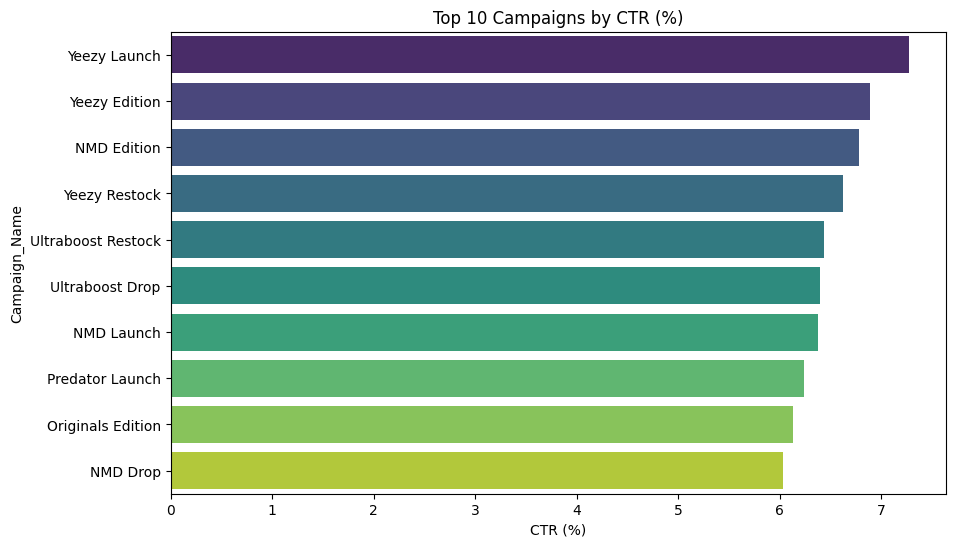

C:\Users\shaur\AppData\Local\Temp\ipykernel_21596\2657086873.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_by_channel.values, y=conv_by_channel.index, palette="magma")


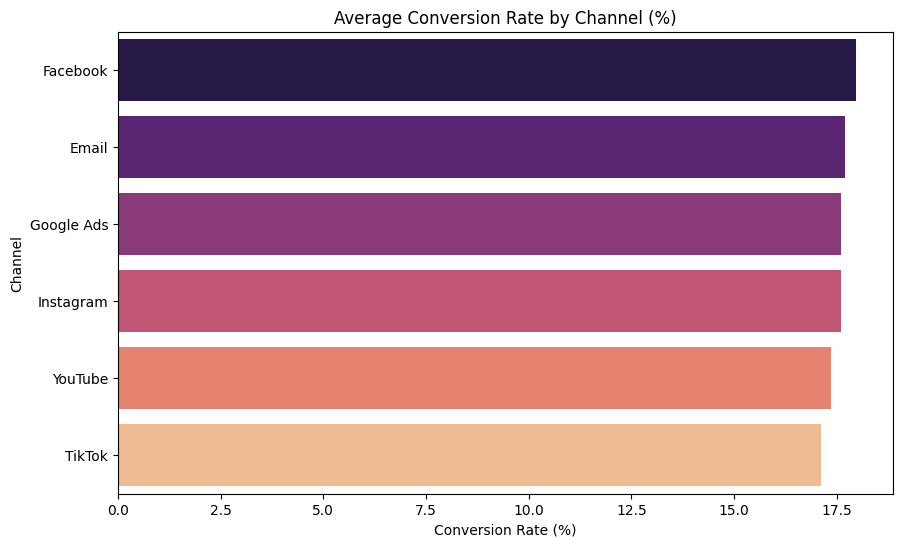

C:\Users\shaur\AppData\Local\Temp\ipykernel_21596\2657086873.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=roi_by_promo.values, y=roi_by_promo.index, palette="rocket")


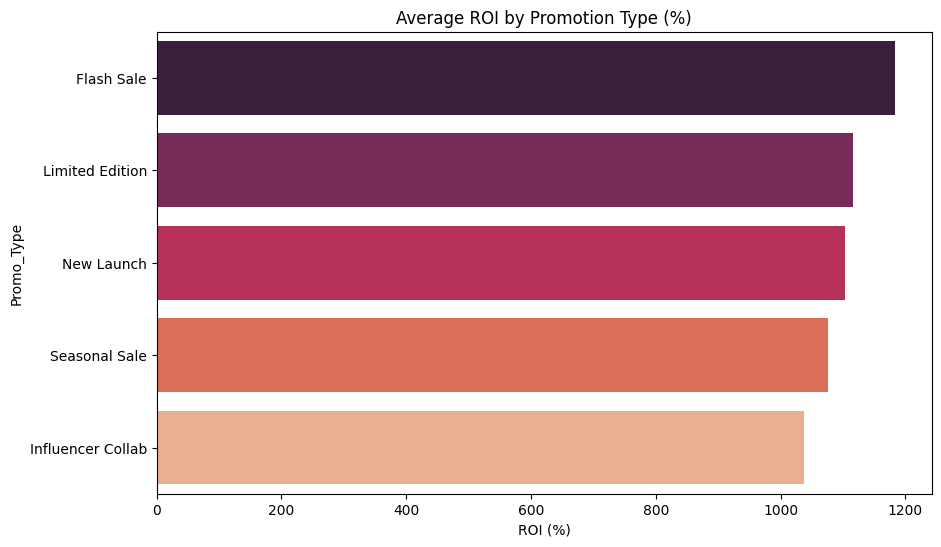

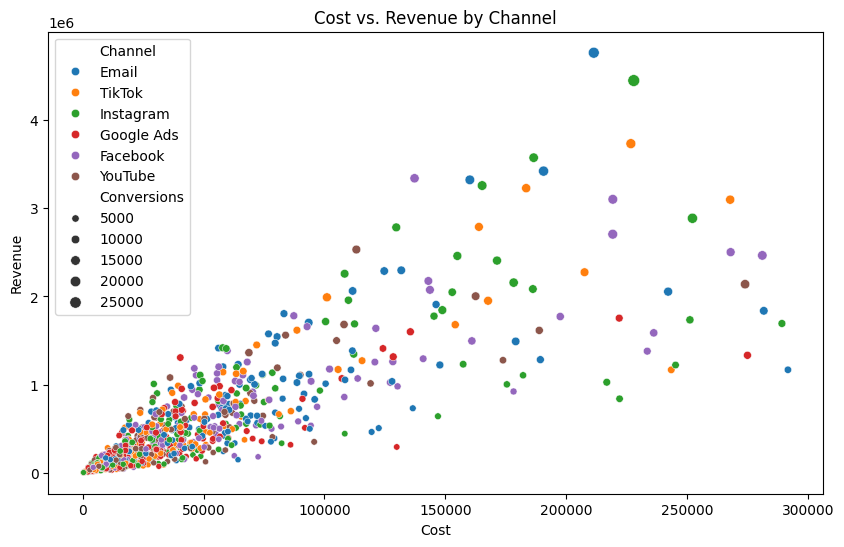

In [5]:
# 1. Calculate CTR and Conversion Rate
df["CTR"] = (df["Clicks"] / df["Impressions"]) * 100
df["Conversion_Rate"] = (df["Conversions"] / df["Clicks"]) * 100
df["ROI"] = ((df["Revenue"] - df["Cost"]) / df["Cost"]) * 100

# 2. Top 10 Campaigns by CTR
top_ctr = df.groupby("Campaign_Name")["CTR"].mean().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ctr.values, y=top_ctr.index, palette="viridis")
plt.title("Top 10 Campaigns by CTR (%)")
plt.xlabel("CTR (%)")
plt.show()

# 3. Conversion Rate by Channel
conv_by_channel = df.groupby("Channel")["Conversion_Rate"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=conv_by_channel.values, y=conv_by_channel.index, palette="magma")
plt.title("Average Conversion Rate by Channel (%)")
plt.xlabel("Conversion Rate (%)")
plt.show()

# 4. ROI by Promotion Type
roi_by_promo = df.groupby("Promo_Type")["ROI"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=roi_by_promo.values, y=roi_by_promo.index, palette="rocket")
plt.title("Average ROI by Promotion Type (%)")
plt.xlabel("ROI (%)")
plt.show()

# 5. Scatter Plot: Cost vs. Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Cost", y="Revenue", hue="Channel", size="Conversions")
plt.title("Cost vs. Revenue by Channel")
plt.show()